# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://learn.wbscodingschool.com/courses/data-science/lessons/%f0%9f%93%9d-5-data-quality/) and use what you've learnt to see how reliable the data is.

In [161]:
import pandas as pd

Load our cleaned DataFrames

In [162]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [163]:
orderlines_cl.info()
orders_cl.info()
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), i

In [164]:
ord_df = orders_cl.copy()
ol_df = orderlines_cl.copy()
prod_df = products_cl.copy()

## 1.&nbsp; Define Pandas display format

In [165]:
# your code here
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.set_option('display.max_rows', 1000)
prod_df
ol_df
ord_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


## 2.&nbsp; Exclude unwanted orders

In [166]:
# your code here
ord_df.groupby('state').count()
#ord_df.groupby('state').count()['order_id'].sum() # = 226904: countercheck to check if equals the n. of rows

,order_id,created_date,total_paid
state,,,
Cancelled,7233,7233,7233
Completed,46605,46605,46605
Pending,14374,14374,14374
Place Order,40883,40883,40883
Shopping Basket,117809,117809,117809


In [167]:
# df.drop(...<rows to drop>..)
states_to_drop = ['Cancelled', 'Shopping Basket', 'Pending', 'Place Order']
ord_df[ord_df['state'].isin(states_to_drop) == False]
ord_df = ord_df[ord_df['state'].isin(states_to_drop) == False]
ord_df.info()
ord_df.state.unique()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 1 to 226614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      46605 non-null  int64  
 1   created_date  46605 non-null  object 
 2   total_paid    46605 non-null  float64
 3   state         46605 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


array(['Completed'], dtype=object)

## make sure that orders in the dataset are in both orders and orderlines

In [168]:
ol_df.shape, ord_df.shape

((216250, 7), (46605, 4))

In [169]:
ol_df.nunique(), ord_df.nunique()

(id                  216250
 id_order            170213
 product_id               1
 product_quantity        61
 sku                   6798
 unit_price            7707
 date                207366
 dtype: int64,
 order_id        46605
 created_date    46506
 total_paid      12834
 state               1
 dtype: int64)

In [170]:
print('ord_df has', ord_df.order_id.nunique(), 'unique orders')
ord_df_ids = ord_df.order_id.unique()
print(len(ord_df_ids), type(ord_df_ids))

ord_df has 46605 unique orders
46605 <class 'numpy.ndarray'>


In [171]:
ol_df = ol_df[ol_df['id_order'].isin(ord_df_ids)]
print(ol_df.shape)
ol_df.nunique()

(56714, 7)


id                  56714
id_order            43064
product_id              1
product_quantity       27
sku                  5400
unit_price           4929
date                56271
dtype: int64

In [172]:
ol_df_ids = ol_df.id_order.unique()

In [173]:
print(ord_df.shape)
ord_df[ord_df['order_id'].isin(ol_df_ids)]

(46605, 4)


,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [174]:
ord_df = ord_df[ord_df['order_id'].isin(ol_df_ids)]
print(ol_df.shape, ord_df.shape)
ol_df.nunique(), ord_df.nunique()

(56714, 7) (43064, 4)


(id                  56714
 id_order            43064
 product_id              1
 product_quantity       27
 sku                  5400
 unit_price           4929
 date                56271
 dtype: int64,
 order_id        43064
 created_date    42981
 total_paid      10714
 state               1
 dtype: int64)

## 3.&nbsp; Exclude orders with unknown products


In [175]:
# your code here
print(len(prod_df))
all_prod = prod_df.sku.unique()
print(len(all_prod))
prod_df.info()

9992
9992
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [176]:
print(ol_df.shape)
ol_df.nunique()

(56714, 7)


id                  56714
id_order            43064
product_id              1
product_quantity       27
sku                  5400
unit_price           4929
date                56271
dtype: int64

In [177]:
ol_df['sku'].isin(all_prod).value_counts()

sku
True     55320
False     1394
Name: count, dtype: int64

In [178]:
ol_df[~ol_df['sku'].isin(all_prod)].count()

id                  1394
id_order            1394
product_id          1394
product_quantity    1394
sku                 1394
unit_price          1394
date                1394
dtype: int64

In [179]:
# all the rows containing products not listed in the products dataset
ol_df[~ol_df['sku'].isin(all_prod)]

,id,id_order,product_id,product_quantity,sku,unit_price,date
99,1119316,299638,0,1,SYN0127,223.24,2017-01-01 11:56:18
167,1119477,299706,0,1,EVU0007,28.49,2017-01-01 13:57:16
173,1119494,299712,0,1,APP0608,279.99,2017-01-01 14:10:47
303,1119745,299860,0,1,PAC1516,457.89,2017-01-01 18:40:38
323,1119800,299881,0,1,SAN0137,49.39,2017-01-01 19:13:45
...,...,...,...,...,...,...,...
214989,1647363,526037,0,1,FIB0008,59.99,2018-03-12 16:52:46
214998,1647388,526048,0,1,SEV0024,59.99,2018-03-12 17:20:40
215056,1647526,526106,0,1,IFX0020,10.99,2018-03-12 19:09:54
215068,1647561,526122,0,1,IOT0018,24.99,2018-03-12 20:04:49


In [180]:
corrupted_id_orders = ol_df.loc[~ol_df['sku'].isin(all_prod), 'id_order']
print(len(corrupted_id_orders))

1394


In [181]:
print(ol_df.shape, ord_df.shape)
ol_df.nunique(), ord_df.nunique()

(56714, 7) (43064, 4)


(id                  56714
 id_order            43064
 product_id              1
 product_quantity       27
 sku                  5400
 unit_price           4929
 date                56271
 dtype: int64,
 order_id        43064
 created_date    42981
 total_paid      10714
 state               1
 dtype: int64)

In [182]:
# print number of corrupted orders in orderlines dataset and in orders dataset
print(
    'corrupted orders in orderlines dataset:', ol_df[ol_df['id_order'].isin(corrupted_id_orders)].shape[0],
    '\ncorrupted orders in orders dataset:', ord_df[ord_df['order_id'].isin(corrupted_id_orders)].shape[0], '\n'
)

corrupted orders in orderlines dataset: 2390 
corrupted orders in orders dataset: 1363 



In [183]:
ol_df = ol_df[~ol_df['id_order'].isin(corrupted_id_orders)]
ord_df = ord_df[~ord_df['order_id'].isin(corrupted_id_orders)]

In [184]:
56714 - 2390, 43064 - 1363

(54324, 41701)

In [185]:
print(ol_df.shape, ord_df.shape, prod_df.shape)
ol_df.nunique(), ord_df.nunique(), prod_df.nunique()

(54324, 7) (41701, 4) (9992, 6)


(id                  54324
 id_order            41701
 product_id              1
 product_quantity       27
 sku                  5140
 unit_price           4735
 date                53921
 dtype: int64,
 order_id        41701
 created_date    41626
 total_paid      10296
 state               1
 dtype: int64,
 sku         9992
 name        9836
 desc        6769
 price       2332
 in_stock       2
 type         125
 dtype: int64)

## 4.&nbsp; Explore the revenue from different tables

In [186]:
backup_ol_df = ol_df.copy()
backup_ord_df = ord_df.copy()
backup_prod_df = prod_df.copy()

In [187]:
# search for missing values in the dataset, e.g. Nan; this df is already the clean one
ord_df.isna().sum()

order_id        0
created_date    0
total_paid      0
state           0
dtype: int64

In [188]:
ord_df.total_paid.astype(str).str.contains("\d+\.\d+\.\d+").sum()

0

In [189]:
ol_df.unit_price.isna().sum()

0

In [193]:
ol_df.unit_price.astype(str).str.contains("\d+\.\d+\.\d+").sum()

0

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [194]:
# your code here
ol_df['unit_price_total'] = ol_df.unit_price*ol_df.product_quantity
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [195]:
# your code here
ol_df.groupby('id_order')['unit_price_total'].sum()

id_order
241423   129.16
242832    10.77
243330    77.99
245275   149.00
245595   105.98
          ...  
527042    13.99
527070    19.98
527074    19.98
527096    29.97
527112     9.99
Name: unit_price_total, Length: 41701, dtype: float64

### What is the average difference between `total_paid` and `unit_price_total`?

In [196]:
# your code here
ord_df[['order_id', 'total_paid']]

,order_id,total_paid
1,241423,136.15
2,242832,15.76
3,243330,84.98
5,245275,149.00
6,245595,112.97
...,...,...
226544,527042,18.98
226572,527070,24.97
226576,527074,24.97
226598,527096,34.96


In [197]:
totalPaid_vs_unitPriceTotal = ord_df[['order_id', 'total_paid']].merge(
                                ol_df.groupby('id_order')['unit_price_total'].sum(),
                                how='left',
                                left_on='order_id',
                                right_on='id_order'
                                )

In [198]:
totalPaid_vs_unitPriceTotal

,order_id,total_paid,unit_price_total
0,241423,136.15,129.16
1,242832,15.76,10.77
2,243330,84.98,77.99
3,245275,149.00,149.00
4,245595,112.97,105.98
...,...,...,...
41696,527042,18.98,13.99
41697,527070,24.97,19.98
41698,527074,24.97,19.98
41699,527096,34.96,29.97


In [199]:
totalPaid_vs_unitPriceTotal['pay_diff'] = totalPaid_vs_unitPriceTotal.total_paid - totalPaid_vs_unitPriceTotal.unit_price_total
totalPaid_vs_unitPriceTotal.sort_values(by='pay_diff', ascending=False)

,order_id,total_paid,unit_price_total,pay_diff
97,297148,4069.54,84.55,3984.99
81,293308,2635.47,66.49,2568.98
39153,512894,3356.18,1674.60,1681.58
38255,508825,2590.18,1291.60,1298.58
39248,513447,486.89,94.98,391.91
...,...,...,...,...
3761,314570,122.99,164.90,-41.91
318,300474,119.00,164.90,-45.90
5075,319901,60.43,142.44,-82.01
74,289685,15.95,135.97,-120.02


## even though I added the column pay_diff to the new df totalPaid_vs_unitPriceTotal, in the following I work with the series pay_diff:

In [201]:
pay_diff = totalPaid_vs_unitPriceTotal.total_paid - totalPaid_vs_unitPriceTotal.unit_price_total
print(type(pay_diff))
pay_diff

<class 'pandas.core.series.Series'>


0       6.99
1       4.99
2       6.99
3       0.00
4       6.99
        ... 
41696   4.99
41697   4.99
41698   4.99
41699   4.99
41700   4.99
Length: 41701, dtype: float64

In [202]:
pay_diff.describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
dtype: float64

In [203]:
pay_diff.mean(), pay_diff.abs().mean()

(4.474808277978945, 4.569582504016691)

In [204]:
pay_diff.sort_values()

23757   -165.00
74      -120.02
5075     -82.01
318      -45.90
3761     -41.91
          ...  
39248    391.91
38255   1298.58
39153   1681.58
81      2568.98
97      3984.99
Length: 41701, dtype: float64

In [205]:
totalPaid_vs_unitPriceTotal.iloc[23757]

order_id           432303.00
total_paid            261.86
unit_price_total      426.86
pay_diff             -165.00
Name: 23757, dtype: float64

In [206]:
# there are many negative values => unit_price_total > total_paid
pay_diff.where(pay_diff<-2).dropna().sort_values()#.head(10)

23757   -165.00
74      -120.02
5075     -82.01
318      -45.90
6683     -41.91
          ...  
2580      -5.00
35990     -4.99
4378      -4.99
37113     -4.99
37260     -4.99
Length: 155, dtype: float64

### What is the distribution of these differences?

41701


<Axes: >

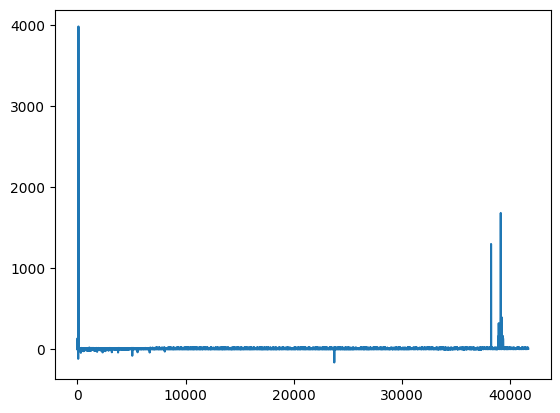

In [207]:
# your code here
print(pay_diff.count())
pay_diff.plot()

In [212]:
#condition = pay_diff.abs() > 8*pay_diff.mean()
condition = pay_diff.abs() >= 100

print(
    pay_diff.where(condition).notnull().value_counts(),
    pay_diff.where(condition).notnull().value_counts(normalize=True)
)

new_pay_diff = pay_diff.where(condition).dropna()
print(type(new_pay_diff))
new_pay_diff.sort_values()

False    41681
True        20
Name: count, dtype: int64 False   1.00
True    0.00
Name: proportion, dtype: float64
<class 'pandas.core.series.Series'>


23757   -165.00
74      -120.02
38943    103.99
38966    114.97
39368    131.98
5        132.21
38964    160.69
39345    162.98
38976    168.95
89       180.98
39222    239.87
39169    252.97
39182    255.98
38965    319.98
39178    386.80
39248    391.91
38255   1298.58
39153   1681.58
81      2568.98
97      3984.99
dtype: float64

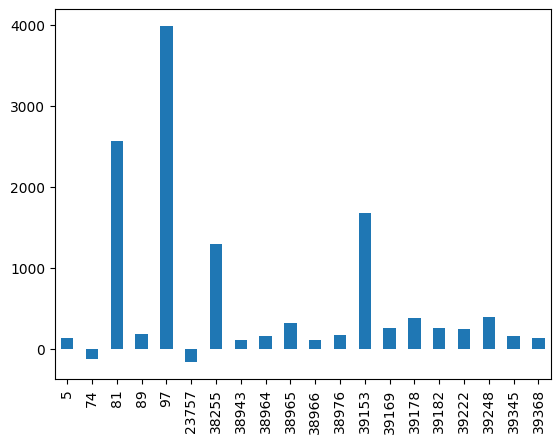

In [245]:
new_pay_diff.plot.bar();

In [272]:
new_pay_diff.nlargest()

97      3984.99
81      2568.98
39153   1681.58
38255   1298.58
39248    391.91
dtype: float64

In [273]:
new_pay_diff.nsmallest()

23757   -165.00
74      -120.02
38943    103.99
38966    114.97
39368    131.98
dtype: float64

In [276]:
new_pay_diff.abs().nlargest(20)

97      3984.99
81      2568.98
39153   1681.58
38255   1298.58
39248    391.91
39178    386.80
38965    319.98
39182    255.98
39169    252.97
39222    239.87
89       180.98
38976    168.95
23757    165.00
39345    162.98
38964    160.69
5        132.21
39368    131.98
74       120.02
38966    114.97
38943    103.99
dtype: float64

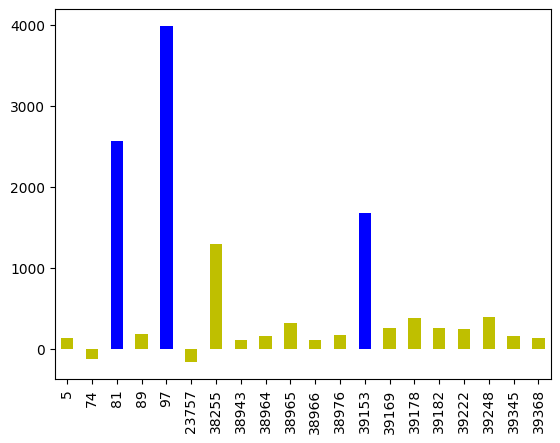

In [271]:
# color pattern to highlight the largest 3 absolute values of pay_diff
color_pattern = ['b'
                  if id in new_pay_diff.abs().nlargest(3)
                  else 'y'
                      for id in new_pay_diff.index ]

new_pay_diff.plot.bar(color=color_pattern);

### I reach the same color pattern using the df totalPaid_vs_unitPriceTotal rather than the series new_pay_diff

In [249]:
# I filtered the new df with the difference in payment >= 100 and sorted by its absolute values
totalPaid_vs_unitPriceTotal.loc[totalPaid_vs_unitPriceTotal.pay_diff.abs() >= 100].sort_values(by='pay_diff', ascending=False, key=abs)

,order_id,total_paid,unit_price_total,pay_diff
97,297148,4069.54,84.55,3984.99
81,293308,2635.47,66.49,2568.98
39153,512894,3356.18,1674.60,1681.58
38255,508825,2590.18,1291.60,1298.58
39248,513447,486.89,94.98,391.91
39178,513009,406.80,20.00,386.80
38965,512146,632.98,313.00,319.98
39182,513049,504.98,249.00,255.98
39169,512969,376.96,123.99,252.97
39222,513298,317.51,77.64,239.87


In [262]:
# here I save the order id of the 3 largest absolute values of pay_diff:
top3_pay_diff_ids = totalPaid_vs_unitPriceTotal.loc[totalPaid_vs_unitPriceTotal.pay_diff.abs() >= 100].sort_values(by='pay_diff', ascending=False, key=abs)['order_id'].head(3)
top3_pay_diff_ids

97       297148
81       293308
39153    512894
Name: order_id, dtype: int64

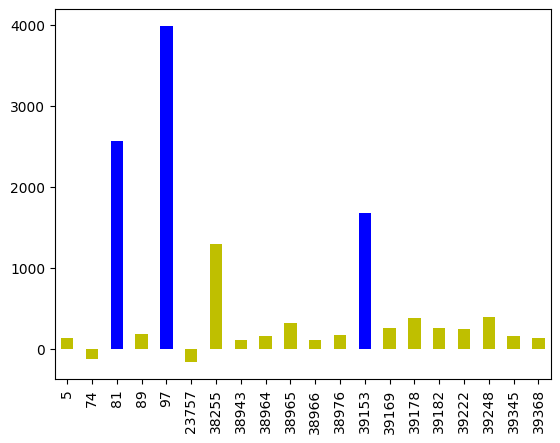

In [264]:
totalPaid_vs_unitPriceTotal.loc[totalPaid_vs_unitPriceTotal.pay_diff.abs() >= 100, ['order_id', 'pay_diff']].sort_values(by='pay_diff', ascending=False, key=abs)

#pay_diff_groupedby_id = ol_df.groupby([ol_df.date.dt.weekday])["id_order"].sum()
top3_pay_diff_ids = totalPaid_vs_unitPriceTotal.loc[totalPaid_vs_unitPriceTotal.pay_diff.abs() >= 100].sort_values(by='pay_diff', ascending=False, key=abs)['order_id'].head(3)

color_pattern = ['b'
                  if id in top3_pay_diff_ids
                  else 'y'
                      for id in new_pay_diff.index ]

new_pay_diff.plot.bar(color=color_pattern);

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [130]:
# your explanation here

### If there are differences that you can’t explain: what should you do with these orders?

In [131]:
# Vasil: eliminate the outliers
Q1 = pay_diff.quantile(0.25)
Q3 = pay_diff.quantile(0.75)
IQR = Q3-Q1

In [132]:
Q1 - 1.5*IQR

-10.484999999999971

In [133]:
Q3 + 1.5*IQR

17.47499999999995

In [134]:
totalPaid_vs_unitPriceTotal.loc[
                ~ ((totalPaid_vs_unitPriceTotal['pay_diff'] >= (Q1 - 1.5*IQR)) &
                (totalPaid_vs_unitPriceTotal['pay_diff'] <= (Q3 + 1.5*IQR)) )
                                ].sort_values(by='pay_diff')

,order_id,total_paid,unit_price_total,pay_diff
23757,432303,261.86,426.86,-165.00
74,289685,15.95,135.97,-120.02
5075,319901,60.43,142.44,-82.01
318,300474,119.00,164.90,-45.90
6683,327363,122.99,164.90,-41.91
...,...,...,...,...
39248,513447,486.89,94.98,391.91
38255,508825,2590.18,1291.60,1298.58
39153,512894,3356.18,1674.60,1681.58
81,293308,2635.47,66.49,2568.98


In [135]:
noOutliers_totalPaid_vs_unitPriceTotal = totalPaid_vs_unitPriceTotal.loc[
                ((totalPaid_vs_unitPriceTotal['pay_diff'] >= (Q1 - 1.5*IQR)) &
                (totalPaid_vs_unitPriceTotal['pay_diff'] <= (Q3 + 1.5*IQR)) )
                                ]
noOutliers_totalPaid_vs_unitPriceTotal

,order_id,total_paid,unit_price_total,pay_diff
0,241423,136.15,129.16,6.99
1,242832,15.76,10.77,4.99
2,243330,84.98,77.99,6.99
3,245275,149.00,149.00,0.00
4,245595,112.97,105.98,6.99
...,...,...,...,...
41696,527042,18.98,13.99,4.99
41697,527070,24.97,19.98,4.99
41698,527074,24.97,19.98,4.99
41699,527096,34.96,29.97,4.99


### now I gotta remove the orders that represent the outliers also in the ord_df and ol_df

In [136]:
no_outliers_ids = list(noOutliers_totalPaid_vs_unitPriceTotal.order_id)

In [282]:
ord_df = ord_df.loc[ord_df['order_id'].isin(no_outliers_ids)]
ol_df = ol_df.loc[ol_df['id_order'].isin(no_outliers_ids)]
print(ol_df.shape, ord_df.shape)
ol_df.nunique(), ord_df.nunique(), prod_df.nunique()

(53231, 8) (40985, 4)


(id                  53231
 id_order            40985
 product_id              1
 product_quantity       27
 sku                  5098
 unit_price           4342
 date                52840
 unit_price_total     5483
 dtype: int64,
 order_id        40985
 created_date    40914
 total_paid       9878
 state               1
 dtype: int64,
 sku         9992
 name        9836
 desc        6769
 price       2332
 in_stock       2
 type         125
 dtype: int64)

In [289]:
final_orders_df = ord_df.copy()
final_orderlines_df = ol_df.copy()
final_products_df = prod_df.copy()

In [290]:
del final_orderlines_df['unit_price_total']

In [291]:
final_orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53231 entries, 6 to 215949
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.2+ MB


In [292]:
final_orders_df.to_csv('final_orders.csv', index=False)
final_orderlines_df.to_csv('final_orderlines.csv', index=False)
final_products_df.to_csv('final_products.csv', index=False)

In [155]:
#2367 : 40985 = x : 100
percentage = (236700/40985)
print('If I introduce my corrections of `orderlines.unit_price` from orders.total_paid, that will account to only', round(percentage, 2),\
      '% of the total orders (considering already the cleaned df and only state "Completed)."')

If I introduce my corrections of `orderlines.unit_price` from orders.total_paid, that will account to only 5.78 % of the total orders (considering already the cleaned df and only state "Completed)."


## The following was my first idea to eliminate the weird values in total_paid - total_unit_price (simply selecting a value larger than a price or ntimes* mean value).
## It is better to work with interquartile ranges to eliminate the outliers

In [ ]:
# in the condition, I should set a threshold value beyond which I delete the data I can't explain:
# e.g. all differences larger than 100€:
# new_totalPaid_vs_unitPriceTotal = totalPaid_vs_unitPriceTotal[totalPaid_vs_unitPriceTotal['pay_diff'].abs() < 100].sort_values(by='pay_diff')

print(totalPaid_vs_unitPriceTotal[totalPaid_vs_unitPriceTotal['pay_diff'].abs() >= 100].count())
totalPaid_vs_unitPriceTotal[totalPaid_vs_unitPriceTotal['pay_diff'].abs() >= 100].sort_values(by='pay_diff')

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

## your thoughts:
There are avg differences that are too large and can't be explained by shipping costs. I'd rather eliminate them.
In general, I could include all the differences up to 100€, which is already a lot (maybe up to 50€? I can still change).

ONE DOUBT, why are there negative differences??? \
(unit_price_total > total_paid) So the customer paid less than what was supposed to. Maybe one of the products was sent back afterwards??

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")